# Budget Analysis

# Package Import 

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import re

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, time, timedelta, datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Database Connection using SQLAlcehemy

In [4]:
try:
    conn = create_engine('sqlite:///money_android.sqlite')
    try:
        display(pd.read_sql('SELECT name AS tables FROM sqlite_master WHERE type="table"', conn))
    except Exception as e:
        print(f'Error Retrieving data: {e}')
except Exception as e:
    print(f'Database connection fail : {e}')

tables
0    android_metadata
1       MESSAGEMACRO2
2     sqlite_sequence
3           INOUTCOME
4              ASSETS
5           ZCATEGORY
6                ZETC
7        SMS_RAW_READ
8   REPEATTRANSACTION
9      FAVTRANSACTION
10         ASSETGROUP
11              PHOTO
12             BUDGET
13      BUDGET_AMOUNT
14           CURRENCY
15               MEMO
16                TAG
17             TX_TAG
18          CODE_DATA
19          CODE_LINK

In [5]:
# pd.read_sql('select * from INOUTCOME', conn)

# Data Import

In [7]:
bdgt_tbl = pd.read_sql('select * from INOUTCOME', conn)
cat_tbl = pd.read_sql('select * from ZCATEGORY', conn)
asset_tbl = pd.read_sql('select * from ASSETS', conn)

display(bdgt_tbl, cat_tbl, asset_tbl)

AID                                   uid assetUid CARDDIVIDMONTH  \
0      1  c8638ef1-5755-4492-87e0-fc2cc234791e       11              0   
1      2  845207f5-c8ae-4116-8e62-20ece9ca2c2f       11              0   
2      3  011c5f04-6c3e-4bce-9e63-e303c4ac570a        2              0   
3      4  1d502cea-0868-4243-a6e2-c4ec06dc0717       11              0   
4      5  88eb9171-fd63-4c0e-95b9-c5d149e2e01c        1              0   
..   ...                                   ...      ...            ...   
563  569  517669f2-2a38-425e-affd-0efefe3dba8d       11              0   
564  571  d15c5bd1-c8bd-4587-835a-1f1f68da6269        1              0   
565  572  f025f239-8520-4737-a8a2-3b9dbb854331       11              0   
566  573  1c540e4f-e1fa-4809-92f0-18854c75c308       11              0   
567  574  c3622d5e-51d8-4f64-b4e8-05f689f94c33        1              0   

                                   ctgUid toAssetUid           ZCONTENT  \
0                                       9                                 
1                                       6                   Don Lemon 🍋   
2                                       6                       Samgyup   
3                                       6                       Samgyup   
4                                      17             Udemy + Corn Kape   
..                                    ...        ...                ...   
563  8087c509-180d-4b4a-ac10-468a0f868662                         Lunch   
564                                               11           Withdraw   
565                                                1           Withdraw   
566  e23aa8f6-06d9-4b33-a1c5-e696faa16224                Snack (Office)   
567  42d4ac1f-866b-4e15-820b-6a7b762ec602                                 

             ZDATE       WDATE wtime  paid DO_TYPE    ZMONEY  \
0    1726617607841  2024-09-18  None  None       1   1475.23   
1    1726632007841  2024-09-18  None  None       1   1711.26   
2    1726380441057  2024-09-15  None  None       1  116660.8   
3    1726227055993  2024-09-13  None  None       1  35346.39   
4    1726231445059  2024-09-13  None  None       1  76711.71   
..             ...         ...   ...   ...     ...       ...   
563  1744072365017  2025-04-08  None  None       1     238.0   
564  1744072692072  2025-04-08  None  None       3     200.0   
565  1744072692072  2025-04-08  None  None       4     200.0   
566  1744114014015  2025-04-08  None  None       1      50.0   
567  1744114095765  2025-04-08  None  None       0    2542.0   

                               txUidTrans ZDATA SMS_RDATE IN_ZMONEY ASSET_NIC  \
0                                                              25.0      None   
1                                                              29.0      None   
2                                                            1977.0      None   
3                                                             599.0      None   
4                                                            1300.0      None   
..                                    ...   ...       ...       ...       ...   
563                                                           238.0      None   
564  0165529b-7676-454b-8440-c194efaae437                     200.0      None   
565  0165529b-7676-454b-8440-c194efaae437                     200.0      None   
566                                                            50.0      None   
567                                                          2542.0      None   

    CATEGORY_NAME cardDivideUid CARD_DIVIDE_MONTH_STR  MARK  \
0            None                                         0   
1            None                                         0   
2            None                                         0   
3            None                                         0   
4            None                                         0   
..            ...           ...                   ...   ...   
563          None               

ID C_IS_DEL        C_UTIME                                   uid  \
0    1     None  1726638920691                                     1   
1    2     None  1726638920691                                     2   
2    3     None  1726638920693                                     3   
3    4     None  1726638920694                                     4   
4    5     None  1726638920695                                     5   
..  ..      ...            ...                                   ...   
64  65     None  1739582285466  e23aa8f6-06d9-4b33-a1c5-e696faa16224   
65  66     None  1739106862285  7b0c7dac-639f-41b4-a7f5-4e34a654a1fc   
66  67     None  1739582090198  42d4ac1f-866b-4e15-820b-6a7b762ec602   
67  68     None  1739582285460  8087c509-180d-4b4a-ac10-468a0f868662   
68  69     None  1741267851692  fc29ffb6-1776-4681-8868-ef08cb7804a0   

            NAME  ORDERSEQ  TYPE  STATUS  \
0    🤑 Allowance         1     0       0   
1       💰 Salary         2     0       0   
2   💵 Petty cash         3     0       0   
3        🏅 Bonus         4     0       0   
4          Other         5     0       0   
..           ...       ...   ...     ...   
64      Snacks 🍟         5     1       2   
65    Internet 💻        66     1       2   
66    Incentives        67     0       0   
67     Breakfast         0     1       2   
68        Sports        68     1       2   

                                    pUid  isSynced syncTime  syncVersion  
0                                      0         0     None            0  
1                                      0         0     None            0  
2                                      0         0     None            0  
3                                      0         0     None            0  
4                                      0         0     None            0  
..                                   ...       ...      ...          ...  
64                                     6         0     None            0  
65  4076de27-f668-41e8-ac5c-dcc0c69b7cae         0     None            0  
66                                               0     None            0  
67                                     6         0     None            0  
68                                     7         0     None            0  

[69 rows x 12 columns]

ID CARD_DAY_FIN CARD_DAY_PAY  NIC_NAME  ORDERSEQ ZDATA ZDATA1 ZDATA2  \
0   1            1            1      Cash         1                   0   
1   2            1            1  Accounts         2                   0   
2   3            1            1      Card         3                   0   

   IS_TRANS_EXPENSE  IS_CARD_AUTO_PAY APP_PACKAGE APP_NAME SMS_TEL SMS_STRING  \
0                 0                 0        None     None                      
1                 0                 0        None     None                      
2                 0                 0        None     None                      

         A_UTIME  CARD_USAGE_HURDLE_TYPE CARD_USAGE_HURDLE_START_DATE  \
0  1736642830921                       1                         None   
1  1736642830924                       1                         None   
2  1736642830925                       1                         None   

   CARD_USAGE_HURDLE_AMOUNT uid currencyUid cardAssetUid groupUid  isSynced  \
0                       0.0  11     PHP_USD                    11         0   
1                       0.0   1     PHP_USD                     1         0   
2                       0.0   2     PHP_USD            1        2         0   

  syncTime syncVersion  
0     None        None  
1     None        None  
2     None        None

In [8]:
# bdgt_tbl[bdgt_tbl['DO_TYPE']=='0']
# bdgt_tbl['DO_TYPE'].unique()

# Data Mapping

In [10]:
# --- Mapping the categories and assets -- #
cat_dict = dict(zip(cat_tbl['uid'], cat_tbl['NAME']))
asset_dict = dict(zip(asset_tbl['uid'], asset_tbl['NIC_NAME']))
do_dict = {'0':'Income', '1':'Expense', '3':'Transfer From', '4':'Transfer To'}

bdgt_tbl['Category'] = bdgt_tbl['ctgUid'].map(cat_dict)
bdgt_tbl['Assets'] = bdgt_tbl['assetUid'].map(asset_dict)
bdgt_tbl['Fin_Transaction'] = bdgt_tbl['DO_TYPE'].map(do_dict)


final_bdg = bdgt_tbl[['uid', 'Fin_Transaction', 'Assets', 'Category', 'ZCONTENT', 'WDATE', 'IN_ZMONEY']]
final_bdg.rename(columns= {'ZCONTENT':'Notes', 'WDATE':'Dates', 'IN_ZMONEY':'Amount'}, inplace=True)

***DO_TYPE*** :<br>
0 - Income<br>
1 - Expense<br>
3 - Transfer (FROM)<br>
4 - Transfer (TO)<br>

DO_TYPE is the field to indicate what kind of ***financial transaction*** is being recorded.

In [12]:
final_bdg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   uid              568 non-null    object
 1   Fin_Transaction  568 non-null    object
 2   Assets           568 non-null    object
 3   Category         472 non-null    object
 4   Notes            568 non-null    object
 5   Dates            568 non-null    object
 6   Amount           568 non-null    object
dtypes: object(7)
memory usage: 31.2+ KB


In [13]:
final_bdg

uid Fin_Transaction    Assets  \
0    c8638ef1-5755-4492-87e0-fc2cc234791e         Expense      Cash   
1    845207f5-c8ae-4116-8e62-20ece9ca2c2f         Expense      Cash   
2    011c5f04-6c3e-4bce-9e63-e303c4ac570a         Expense      Card   
3    1d502cea-0868-4243-a6e2-c4ec06dc0717         Expense      Cash   
4    88eb9171-fd63-4c0e-95b9-c5d149e2e01c         Expense  Accounts   
..                                    ...             ...       ...   
563  517669f2-2a38-425e-affd-0efefe3dba8d         Expense      Cash   
564  d15c5bd1-c8bd-4587-835a-1f1f68da6269   Transfer From  Accounts   
565  f025f239-8520-4737-a8a2-3b9dbb854331     Transfer To      Cash   
566  1c540e4f-e1fa-4809-92f0-18854c75c308         Expense      Cash   
567  c3622d5e-51d8-4f64-b4e8-05f689f94c33          Income  Accounts   

        Category              Notes       Dates  Amount  
0    🚖 Transport                     2024-09-18    25.0  
1         🍜 Food        Don Lemon 🍋  2024-09-18    29.0  
2         🍜 Food            Samgyup  2024-09-15  1977.0  
3         🍜 Food            Samgyup  2024-09-13   599.0  
4          Other  Udemy + Corn Kape  2024-09-13  1300.0  
..           ...                ...         ...     ...  
563    Breakfast              Lunch  2025-04-08   238.0  
564          NaN           Withdraw  2025-04-08   200.0  
565          NaN           Withdraw  2025-04-08   200.0  
566     Snacks 🍟     Snack (Office)  2025-04-08    50.0  
567   Incentives                     2025-04-08  2542.0  

[568 rows x 7 columns]

In [14]:
# final_bdg[final_bdg['DO_TYPE'] == '3']

Most importannt Columns to observe and analyze:
- Category
- Dates
- Amount

In [16]:
def convert_dtype(df):
    df['Dates'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d", errors='coerce')
    df['Amount'] = df.Amount.astype(float)
    return df
def preprocess(df):
    # --- Converting empty spaces to None --- #
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) and x.strip() != '' else (None if isinstance(x, str) else x))
    # --- Textual Cleaning --- # 
    def remove_emojis(textdata):
        if isinstance(textdata, str):
            emoji_pattern = re.compile(
                "["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                "]+",
                flags=re.UNICODE)
            return emoji_pattern.sub(r'', textdata)
        return textdata
    df['Category'] = df['Category'].apply(remove_emojis)
    return df

In [17]:
sample = final_bdg.copy(deep = True)
 
sample = convert_dtype(sample)
sample = preprocess(sample)
sample.sort_values('Dates', inplace=True)
display(sample.info(), sample)

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 3 to 567
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   uid              568 non-null    object        
 1   Fin_Transaction  568 non-null    object        
 2   Assets           568 non-null    object        
 3   Category         472 non-null    object        
 4   Notes            376 non-null    object        
 5   Dates            568 non-null    datetime64[ns]
 6   Amount           568 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 35.5+ KB


None

uid Fin_Transaction    Assets  \
3    1d502cea-0868-4243-a6e2-c4ec06dc0717         Expense      Cash   
4    88eb9171-fd63-4c0e-95b9-c5d149e2e01c         Expense  Accounts   
11   353bd3db-b03e-4b27-9bef-cc66c64652ee         Expense      Cash   
2    011c5f04-6c3e-4bce-9e63-e303c4ac570a         Expense      Card   
10   96a4eecc-3932-46b6-a851-4563af51390b         Expense  Accounts   
..                                    ...             ...       ...   
565  f025f239-8520-4737-a8a2-3b9dbb854331     Transfer To      Cash   
566  1c540e4f-e1fa-4809-92f0-18854c75c308         Expense      Cash   
563  517669f2-2a38-425e-affd-0efefe3dba8d         Expense      Cash   
564  d15c5bd1-c8bd-4587-835a-1f1f68da6269   Transfer From  Accounts   
567  c3622d5e-51d8-4f64-b4e8-05f689f94c33          Income  Accounts   

       Category              Notes      Dates  Amount  
3          Food            Samgyup 2024-09-13   599.0  
4         Other  Udemy + Corn Kape 2024-09-13  1300.0  
11         Food               None 2024-09-14   255.0  
2          Food            Samgyup 2024-09-15  1977.0  
10     Medicine               None 2024-09-16   232.0  
..          ...                ...        ...     ...  
565         NaN           Withdraw 2025-04-08   200.0  
566     Snacks      Snack (Office) 2025-04-08    50.0  
563   Breakfast              Lunch 2025-04-08   238.0  
564         NaN           Withdraw 2025-04-08   200.0  
567  Incentives               None 2025-04-08  2542.0  

[568 rows x 7 columns]

In [18]:
jan = sample[(sample['Dates'] >= '2025-01-01') & (sample['Dates'] <= '2025-01-31') & (sample['Fin_Transaction'] == 'Expense')]
feb = sample[(sample['Dates'] >= '2025-02-01') & (sample['Dates'] <= '2025-02-28') & (sample['Fin_Transaction'] == 'Expense')]
mar = sample[(sample['Dates'] >= '2025-03-01') & (sample['Dates'] <= '2025-03-31') & (sample['Fin_Transaction'] == 'Expense')]
q1 = sample[(sample['Dates'] >= '2025-01-01') & (sample['Dates'] <= '2025-03-31') & (sample['Fin_Transaction'] == 'Expense')]

dfs = {'January': jan, 'February':feb, 'March':mar, 'Q1':q1}
for month, df in dfs.items():
    print(month)
    display(df)

January


uid Fin_Transaction    Assets  \
141  38c0b68a-f491-42ff-a998-382cad5d561f         Expense  Accounts   
138  bc84e704-7424-45b3-bd08-9bc220307e30         Expense      Cash   
139  9b258070-3f8d-4cea-afaa-82631f85b4b1         Expense      Cash   
140  a4a26093-fbb2-44bc-8e35-b05b26c3ae0e         Expense  Accounts   
148  e9b4be93-4a18-472f-b380-e57feb76a435         Expense      Cash   
..                                    ...             ...       ...   
264  65eef4fd-f96b-4988-9b20-b2ea71d18963         Expense      Cash   
268  a5089716-c0e6-4204-8977-6aaf1381b38a         Expense  Accounts   
261  3394aefe-b1b5-4d3a-9abe-da085c383bd6         Expense      Cash   
260  b7c589e3-6d4e-4ceb-bc57-6bb620ea325b         Expense  Accounts   
263  0ee96ca3-c4ac-4d9f-8b41-3fac6876e03b         Expense      Cash   

         Category           Notes      Dates  Amount  
141         Other            Fees 2025-01-02    10.0  
138       Grocery            None 2025-01-02    76.0  
139          Food            None 2025-01-02    95.0  
140      Medicine           Gcash 2025-01-02   633.0  
148          Food      Cassiopeia 2025-01-03   355.0  
..            ...             ...        ...     ...  
264          Food            None 2025-01-31   165.0  
268     Transport         Move It 2025-01-31   139.0  
261          Food          Snacks 2025-01-31    79.0  
260   Liabilities  Snack (Office) 2025-01-31   342.0  
263          Food          Snacks 2025-01-31    75.0  

[101 rows x 7 columns]

February


uid Fin_Transaction    Assets  \
273  202f0e80-b8af-4b5c-9567-fbaffe21eceb         Expense  Accounts   
272  ca2c4e54-e082-435e-865b-6679f7b95c76         Expense      Cash   
270  a01adb03-ef76-4ffa-8e7d-bd0d2699ddcd         Expense  Accounts   
269  b2930f1a-6aa3-4e4b-9424-54f7b4af14f8         Expense      Cash   
271  12b7ec50-0429-4c3c-bbaa-b0369fdf87ac         Expense      Cash   
..                                    ...             ...       ...   
383  847c2333-0618-4940-a650-90c39b5c1308         Expense  Accounts   
386  df5481eb-0363-4358-98bc-85f6cbdbcc50         Expense  Accounts   
379  eb3b7b7c-5340-414b-a90d-2fe2a39e055f         Expense  Accounts   
390  c891bad5-0b8f-499d-9ccc-327b448e1c5a         Expense  Accounts   
388  f3dd66e5-1a43-409b-812f-0bff3f114247         Expense  Accounts   

         Category           Notes      Dates  Amount  
273         Other            Fees 2025-02-01    10.0  
272     Transport            Taxi 2025-02-01   100.0  
270       Grocery            None 2025-02-01  1053.0  
269          Food           Lunch 2025-02-01    85.0  
271  Necessities          Laundry 2025-02-01   200.0  
..            ...             ...        ...     ...  
383         Other            Fees 2025-02-27    10.0  
386         Other          Parcel 2025-02-27  1145.0  
379       Snacks             None 2025-02-27   141.0  
390   Liabilities            None 2025-02-28   130.0  
388       Snacks   Snack (Office) 2025-02-28   178.0  

[93 rows x 7 columns]

March


uid Fin_Transaction    Assets  \
392  677f10d3-da5a-416a-b4a7-be659ed209ce         Expense  Accounts   
393  0515e4ea-8001-4707-9348-25e1546a8a0f         Expense  Accounts   
400  8150122b-dd62-4546-b954-0c07d1deab21         Expense  Accounts   
403  e8a75f75-4799-46a2-bdd5-b9c93ea8f20e         Expense  Accounts   
396  eec00aaa-47ce-4353-97c9-fdc4cb595073         Expense      Cash   
..                                    ...             ...       ...   
540  f1a958f3-52d7-4054-8bcd-404776ea8d09         Expense      Cash   
534  19b932c9-13c3-402b-94f8-7e129cad443b         Expense      Cash   
533  27aac40e-87de-4901-af7c-607b4bca4c04         Expense      Cash   
532  5b7a49fb-76a0-4141-8a6c-9f05a2a995fa         Expense      Cash   
535  c90b99bf-e14f-4ea4-9e09-166072cc49f8         Expense  Accounts   

         Category                    Notes      Dates   Amount  
392   Liabilities                  Shoppee 2025-03-01  2675.16  
393         Other                     Fees 2025-03-01    10.00  
400         Other                     Fees 2025-03-02    10.00  
403     Internet                      None 2025-03-02   225.00  
396         Other                 Offering 2025-03-02   100.00  
..            ...                      ...        ...      ...  
540          Taxi                  Move It 2025-03-31   109.00  
534          Taxi                  Move It 2025-03-31    83.00  
533       Snacks               Don Lemon 🍋 2025-03-31    29.00  
532         Lunch                     None 2025-03-31   100.00  
535         Other  Downpayment - phone LCD 2025-03-31  2500.00  

[103 rows x 7 columns]

Q1


uid Fin_Transaction    Assets  \
141  38c0b68a-f491-42ff-a998-382cad5d561f         Expense  Accounts   
138  bc84e704-7424-45b3-bd08-9bc220307e30         Expense      Cash   
139  9b258070-3f8d-4cea-afaa-82631f85b4b1         Expense      Cash   
140  a4a26093-fbb2-44bc-8e35-b05b26c3ae0e         Expense  Accounts   
148  e9b4be93-4a18-472f-b380-e57feb76a435         Expense      Cash   
..                                    ...             ...       ...   
540  f1a958f3-52d7-4054-8bcd-404776ea8d09         Expense      Cash   
534  19b932c9-13c3-402b-94f8-7e129cad443b         Expense      Cash   
533  27aac40e-87de-4901-af7c-607b4bca4c04         Expense      Cash   
532  5b7a49fb-76a0-4141-8a6c-9f05a2a995fa         Expense      Cash   
535  c90b99bf-e14f-4ea4-9e09-166072cc49f8         Expense  Accounts   

      Category                    Notes      Dates  Amount  
141      Other                     Fees 2025-01-02    10.0  
138    Grocery                     None 2025-01-02    76.0  
139       Food                     None 2025-01-02    95.0  
140   Medicine                    Gcash 2025-01-02   633.0  
148       Food               Cassiopeia 2025-01-03   355.0  
..         ...                      ...        ...     ...  
540       Taxi                  Move It 2025-03-31   109.0  
534       Taxi                  Move It 2025-03-31    83.0  
533    Snacks               Don Lemon 🍋 2025-03-31    29.0  
532      Lunch                     None 2025-03-31   100.0  
535      Other  Downpayment - phone LCD 2025-03-31  2500.0  

[297 rows x 7 columns]

# Explorative Data Analysis

In [19]:
## --- Code will gradually change per Quarter --- ##
# Months for Quarter 1
months_q1 = [month for month, data in dfs.items()][0:3]
# Creating our Monthly Expense
month_sum = [data['Amount'].sum() for data in dfs.values()]

## Total Expenses per Month 

In [66]:
q1.describe()

Dates       Amount
count                            297   297.000000
mean   2025-02-15 02:25:27.272727296   263.352593
min              2025-01-02 00:00:00     5.000000
25%              2025-01-24 00:00:00    65.000000
50%              2025-02-13 00:00:00   101.000000
75%              2025-03-10 00:00:00   195.000000
max              2025-03-31 00:00:00  6509.000000
std                              NaN   580.805983

Text(0, 0.5, 'Total Expenses')

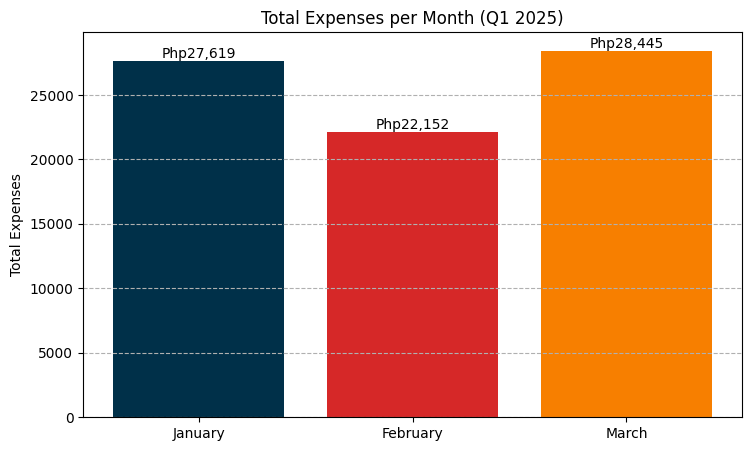

In [64]:
plt.figure(figsize=(8.5,5))
plt.grid(axis='y', linestyle='--', alpha=1)
bars = plt.bar(months_q1, month_sum[0:3], color= ['#003049', '#d62828', '#f77f00'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Php{height:,.0f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Total Expenses per Month (Q1 2025)')
plt.ylabel('Total Expenses')